# LAB ASSIGNMENT 5

**Name:** SHUBHADIP CHAKRABARTI

**Registration Number:** 19BAI1113

**Objectives:** 

    1. To Explore the Different Types of Optical Flow approaches namely, the Lucas-Kanade and the Horn-Schunck approach
    2. Apply the Optical Flow approaches on the two given videos
    3. Apply the Optical Flow approaches on a recorded video

**Input Videos**: Two given Videos + One Recorded Video 

## Basic Information 

There are 4 different types of Optical Flow Methods, namely,

    1. Phase Correlation
    2. Block Based Methods
    3. Differential Methods
    4. Discrete Optimization Methods

We are basically going to implement two differential optical flow methods on the input videos in this experiment.

### Importing Necessary Modules and Functions

In [1]:
#import open CV
import cv2

#import numpy
import numpy as np

We now apply the two motion tracking algorithms on the two sample and one recorded videos. The motion tracking algorithms that we would explore in this exercise are as follows:

    1. Lucas-Kanade Motion Tracking Algorithm
    2. Horn-Schunck Motion Tracking Algorithm

Let us first explore Lucas-Kanade Motion Tracking Algorithm

## Lucas Kanade Algorithm

This algorithm undertakes a localized method to determine optical flow. This method uses a weighted matrix (more like a window) to represent the neighbourhood (i.e 8-connected) pixels. The comparison with those neighbours using least-square metric determines the direction of flow for a particular point. The main advantage of employing this method is that the Sliding window size is small and hence takes less computational time. This method is less sensitive to noise too. But it is noted that this method is less effective when applied across uniform surfaces.

### Sample Video 1

In [2]:
filepath = 'C:/Users/admin/Desktop/Anaconda_Machine Learning/Computer Vision in Healthcare Application/Lab 5_Optical Flow/Videos/slow_traffic_small.mp4'

In [3]:
cap = cv2.VideoCapture(filepath)

feature_params = dict( maxCorners = 100, qualityLevel = 0.3, minDistance = 7, blockSize = 7 )

lk_params = dict(winSize = (15, 15), maxLevel = 2, criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)

mask = np.zeros_like(old_frame)

while(1):
    ret, frame = cap.read()
    if not ret:
        break
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray,frame_gray,p0, None,**lk_params)
    good_new = p1[st == 1]
    good_old = p0[st == 1]

    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)),[0,255,0], 2)
        frame = cv2.circle(frame, (int(a), int(b)), 5,[0,255,0], -1)

    img = cv2.add(frame, mask)
    cv2.imshow("Lucas-Kande: Slow Traffic", img)

    k = cv2.waitKey(25)
    if k == 27:
        break
 
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1, 1, 2)

cv2.destroyAllWindows()

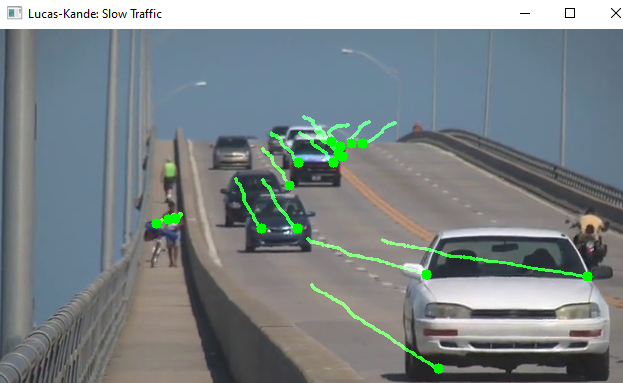

### Sample Video 2

In [4]:
filepath = 'C:/Users/admin/Desktop/Anaconda_Machine Learning/Computer Vision in Healthcare Application/Lab 5_Optical Flow/Videos/vtest.avi'

In [5]:
cap = cv2.VideoCapture(filepath)

feature_params = dict( maxCorners = 100, qualityLevel = 0.3, minDistance = 7, blockSize = 7 )

lk_params = dict(winSize = (15, 15), maxLevel = 2, criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)

mask = np.zeros_like(old_frame)

while(1):
    ret, frame = cap.read()
    if not ret:
        break
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray,frame_gray,p0, None,**lk_params)
    good_new = p1[st == 1]
    good_old = p0[st == 1]

    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)),[0,255,0], 2)
        frame = cv2.circle(frame, (int(a), int(b)), 5,[0,255,0], -1)

    img = cv2.add(frame, mask)
    cv2.imshow("Lucas-Kande: Moving People", img)

    k = cv2.waitKey(25)
    if k == 27:
        break
 
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1, 1, 2)

cv2.destroyAllWindows()

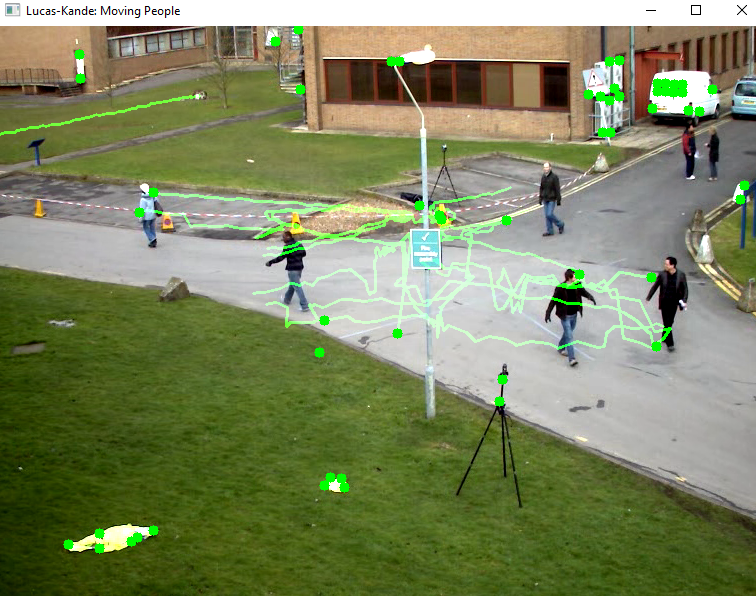

###  Recorded Video

In [6]:
filepath = 'C:/Users/admin/Desktop/Anaconda_Machine Learning/Computer Vision in Healthcare Application/Lab 5_Optical Flow/Videos/recorded.mp4'

In [7]:
cap = cv2.VideoCapture(filepath)

feature_params = dict( maxCorners = 100, qualityLevel = 0.3, minDistance = 7, blockSize = 7 )

lk_params = dict(winSize = (15, 15), maxLevel = 2, criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)

mask = np.zeros_like(old_frame)

while(1):
    ret, frame = cap.read()
    if not ret:
        break
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray,frame_gray,p0, None,**lk_params)
    good_new = p1[st == 1]
    good_old = p0[st == 1]

    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)),[0,255,0], 2)
        frame = cv2.circle(frame, (int(a), int(b)), 5,[0,255,0], -1)

    img = cv2.add(frame, mask)
    cv2.imshow("Lucas-Kande: Recorded video (Oscillating Ball Movement)", img)

    k = cv2.waitKey(25)
    if k == 27:
        break
 
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1, 1, 2)

cv2.destroyAllWindows()

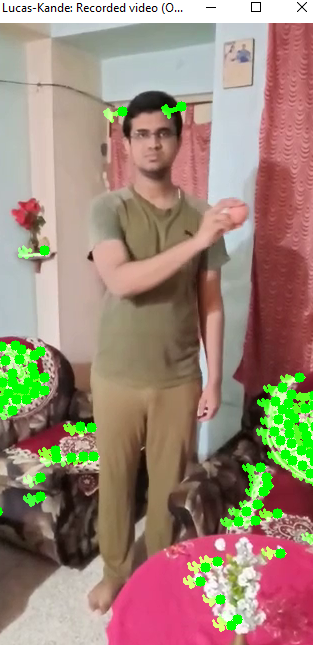

## Inference

We successfully applied the Lucas Kanade Algorithm on two sample and one recorded video. One output frame for each video is attached above.

It is noted that the Lucas Kanade Algorithm performs better on the sample videos when compared to the recorded video.

We now explore the Horn-Schunck Algorithm

## Horn-Schunck Algorithm

Unlike Lucas-Kande Motion Tracking Algorithm, this algorithm uses the global method for determining the optical flow. We here compute the global energy function and it's minimization is done using calculus for all the frames in the video. 
The main advantage here is its effectiveness in both non-uniform and uniform surfaces. 
The main disadvantage includes involvement of high space complexities, high sensitivity to noise and time intensive.
As in Lucas-Kande method, the video frames are considered consecutively, the algorithm is applied which returns a flow array, from which magnitude and angle is found out using carttopolar function of cv2. This is further converted to rgb representation to get the desired output.

### Sample Video 1

In [8]:
filepath = 'C:/Users/admin/Desktop/Anaconda_Machine Learning/Computer Vision in Healthcare Application/Lab 5_Optical Flow/Videos/slow_traffic_small.mp4'

In [9]:
cap = cv2.VideoCapture(filepath)

ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame,cv2.COLOR_BGR2GRAY)
mask = np.zeros_like(old_frame)
    
while(1):
    ret, frame = cap.read()
    if not ret:
        break
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    flow = cv2.calcOpticalFlowFarneback(old_gray, frame_gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    mask[..., 0] = ang * 180 / np.pi / 2
    mask[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
    rgb_representation = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)
    cv2.imshow("Horn-Schnuck: Slow Traffic", rgb_representation)
        
    k = cv2.waitKey(25)
    if k == 27:
        break
    old_gray = frame_gray.copy()
        
cv2.destroyAllWindows()

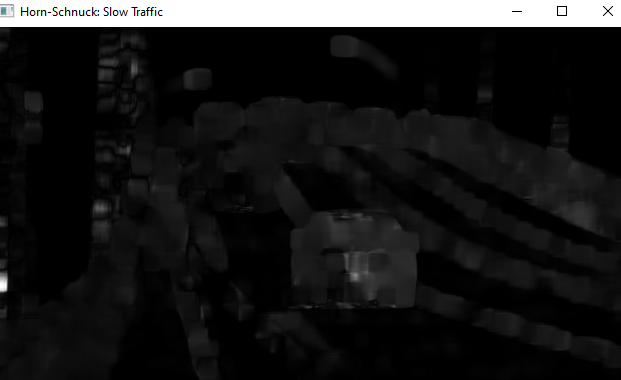

### Sample Video 2

In [10]:
filepath = 'C:/Users/admin/Desktop/Anaconda_Machine Learning/Computer Vision in Healthcare Application/Lab 5_Optical Flow/Videos/vtest.avi'

In [11]:
cap = cv2.VideoCapture(filepath)

ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame,cv2.COLOR_BGR2GRAY)
mask = np.zeros_like(old_frame)
    
while(1):
    ret, frame = cap.read()
    if not ret:
        break
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    flow = cv2.calcOpticalFlowFarneback(old_gray, frame_gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    mask[..., 0] = ang * 180 / np.pi / 2
    mask[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
    rgb_representation = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)
    cv2.imshow("Horn-Schnuck: Moving People", rgb_representation)
        
    k = cv2.waitKey(25)
    if k == 27:
        break
    old_gray = frame_gray.copy()
        
cv2.destroyAllWindows()

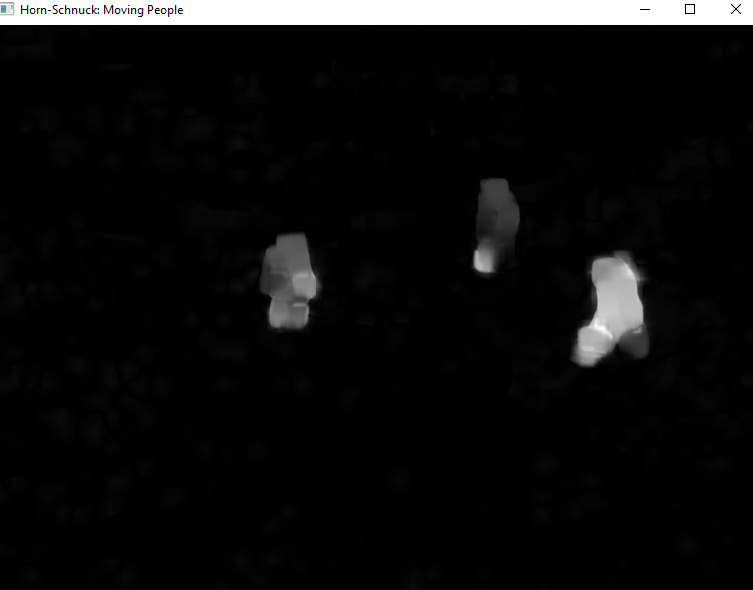

###  Recorded Video

In [12]:
filepath = 'C:/Users/admin/Desktop/Anaconda_Machine Learning/Computer Vision in Healthcare Application/Lab 5_Optical Flow/Videos/recorded.mp4'

In [13]:
cap = cv2.VideoCapture(filepath)

ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame,cv2.COLOR_BGR2GRAY)
mask = np.zeros_like(old_frame)
    
while(1):
    ret, frame = cap.read()
    if not ret:
        break
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    flow = cv2.calcOpticalFlowFarneback(old_gray, frame_gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    mask[..., 0] = ang * 180 / np.pi / 2
    mask[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
    rgb_representation = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)
    cv2.imshow("Horn-Schnuck: Recorded video (Oscillating Ball Movement)",rgb_representation)
        
    k = cv2.waitKey(25)
    if k == 27:
        break
    old_gray = frame_gray.copy()
        
cv2.destroyAllWindows()

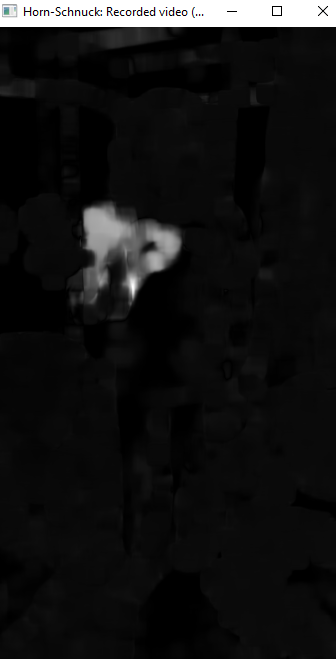

## Inference

We successfully applied the Horn-Schunck Motion Tracking Algorithm on the two given sample videos and one recorded video (Tracking successfully done). One output frame for each video is attached above.

It is noted that the output appears to be a slower version of the input video which is due to the parameters specified at various stages.

## Conclusion

We could acheive the following objectives in this exercise

    1. Exploration of Different Types of Optical Flow approaches namely, the Lucas-Kanade and the Horn-Schunck approach
    2. Successfully applied Optical Flow approaches on the two given sample videos
    3. Successfully applied Optical Flow approaches on the recorded video